In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# NLP libraries
import nltk
import re
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df=pd.read_csv("PHQ-9 NLP Dataset Collection.csv")

In [3]:
df.head()

,Category,Sentence,Severity Level
0,Little interest or pleasure in doing things,এই যে হুটহাট সবকিছু স্বাভাবিক থাকার পরেও অস্বস...,Not Depressed
1,"Feeling down,Depressed, or hopeless",তোমার কথা মনে পড়লে কেমন যেনো এলোমেলো হয়ে যাই আমি,Depressed
2,"Feeling down,Depressed, or hopeless",একটা সড়ক দুর্ঘটনা কেরে নেয় আমার স্বাভাবিক জীবন,Depressed
3,"Feeling down,Depressed, or hopeless",জীবনটা এভাবেই থমকে যাবে আমি কখনোই ভাবিনি,Depressed
4,Little interest or pleasure in doing things,"আমি কোনো কাজে আনন্দ পাই না,কোনো ক্রিয়েটিভ কাজ,...",Depressed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2841 entries, 0 to 2840
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        2841 non-null   object
 1   Sentence        2841 non-null   object
 2   Severity Level  2841 non-null   object
dtypes: object(3)
memory usage: 66.7+ KB


In [5]:
df.columns

Index(['Category', 'Sentence', 'Severity Level'], dtype='object')

In [6]:
df['Severity Level'].unique()

array(['Not Depressed', 'Depressed'], dtype=object)

In [7]:
# Download English stopwords if not already present
nltk.download('stopwords')

# 🔹 Full stopwords list you gave (raw multi-line string)
raw_bangla_stopwords = """
অবশ্য অনেক অনেকে অনেকেই অন্তত অথবা অথচ অর্থাত অন্য আজ আছে আপনার আপনি আবার আমরা আমাকে আমাদের আমার আমি আরও আর আগে আগেই আই অতএব আগামী অবধি অনুযায়ী আদ্যভাগে এই একই একে একটি এখন এখনও এখানে এখানেই এটি এটা এটাই এতটাই এবং একবার এবার এদের এঁদের এমন এমনকী এল এর এরা এঁরা এস এত এতে এসে একে এ ঐ ই ইহা ইত্যাদি উনি উপর উপরে উচিত ও ওই ওর ওরা ওঁর ওঁরা ওকে ওদের ওঁদের ওখানে কত কবে করতে কয়েক কয়েকটি করবে করলেন করার কারও করা করি করিয়ে করার করাই করলে করলেন করিতে করিয়া করেছিলেন করছে করছেন করেছেন করেছে করেন করবেন করায় করে করেই কাছ কাছে কাজে কারণ কিছু কিছুই কিন্তু কিংবা কি কী কেউ কেউই কাউকে কেন কে কোনও কোনো কোন কখনও ক্ষেত্রে খুব গুলি গিয়ে গিয়েছে গেছে গেল গেলে গোটা চলে ছাড়া ছাড়াও ছিলেন ছিল জন্য জানা ঠিক তিনি তিনঐ তিনিও তখন তবে তবু তাঁদের তাঁাহারা তাঁরা তাঁর তাঁকে তাই তেমন তাকে তাহা তাহাতে তাহার তাদের তারপর তারা তারৈ তার তাহলে তিনি তা তাও তাতে তো তত তুমি তোমার তথা থাকে থাকা থাকায় থেকে থেকেও থাকবে থাকেন থাকবেন থেকেই দিকে দিতে দিয়ে দিয়েছে দিয়েছেন দিলেন দু দুটি দুটো দেয় দেওয়া দেওয়ার দেখা দেখে দেখতে দ্বারা ধরে ধরা নয় নানা না নাকি নাগাদ নিতে নিজে নিজেই নিজের নিজেদের নিয়ে নেওয়া নেওয়ার নেই নাই পক্ষে পর্যন্ত পাওয়া পারেন পারি পারে পরে পরেই পরেও পর পেয়ে প্রতি প্রভৃতি প্রায় ফের ফলে ফিরে ব্যবহার বলতে বললেন বলেছেন বলল বলা বলেন বলে বহু বসে বার বা বিনা বরং বদলে বাদে বার বিশেষ বিভিন্ন বিষয়টি ব্যবহার ব্যাপারে ভাবে ভাবেই মধ্যে মধ্যেই মধ্যেও মধ্যভাগে মাধ্যমে মাত্র মতো মতোই মোটেই যখন যদি যদিও যাবে যায় যাকে যাওয়া যাওয়ার যত যতটা যা যার যারা যাঁর যাঁরা যাদের যান যাচ্ছে যেতে যাতে যেন যেমন যেখানে যিনি যে রেখে রাখা রয়েছে রকম শুধু সঙ্গে সঙ্গেও সমস্ত সব সবার সহ সুতরাং সহিত সেই সেটা সেটি সেটাই সেটাও সম্প্রতি সেখান সেখানে সে স্পষ্ট স্বয়ং হইতে হইবে হৈলে হইয়া হচ্ছে হত হতে হতই হবে হবেন হয়েছিল হয়েছে হয়েছেন হয়ে হয়নি হয় হয়েই হয়তো হল হলে হলেও হলো হিসাবে হওয়া হওয়ার হওয়ায় হন হোক জন জনকে জনের জানতে জানায় জানিয়ে জানানো জানিয়েছে জন্য জন্যওজে জে বেশ দেন তুলে ছিলেন চান চায় চেয়ে মোট যথেষ্ট টি অনেক অন্য অবশ্য আগে আছে আজ আবার আমরা আমাদের আর ই উত্তর উপর উপরে এ এই এক্ এখন এত এব এমন এমনি এর এস এসে ও ওই কমনে করা করে কাছে কাজ কাজে কারণ কি কিছু কে কেউ কেখা কেন কোটি কোনো কয়েক খুব গিয়ে গেল চার চালু চেষ্টা ছিল জানা জ্নজন টি তখন তবে তা তাই তো থাকা থেকে দিন দু দুই দেওয়া ধামার নতুন না নাগাদ নিয়ে নেওয়া নয় পর পরে পাচ পি পেয়্র্ প্রতি প্রথম প্রযন্ত প্রাথমিক প্রায় বক্তব্য বন বলা বলে বলেন বহু বা বি বিভিন্ন বেশ বেশি মতো মধ্যে মনে যখন যদি যা যাওয়া যে র রকম লক্ষ শুধু শুরু সঙ্গে সব সহ সাধারণ সামনে সি সে সেই হতে হাজার হয়
"""

# 🔹 Convert to unique set
bangla_stopwords = set(raw_bangla_stopwords.split())

# 🔹 English stopwords
english_stopwords = set(stopwords.words('english'))

# 🔹 Combined stopword set
all_stopwords = bangla_stopwords.union(english_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\miraz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def clean_mixed_text(text):
    text = str(text).lower()                                      # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)           # Remove URLs
    text = re.sub(r"\@\w+|\#", '', text)                          # Remove mentions and hashtags
    text = re.sub(r"\d+", '', text)                               # Remove numbers
    text = re.sub(rf"[{re.escape(string.punctuation)}]", '', text)  # Remove punctuation
    text = re.sub(r"[^\u0980-\u09FFa-zA-Z\s]", '', text)          # Remove emojis and symbols (keep Bangla + English letters only)
    text = re.sub(r'\s+', ' ', text).strip()                      # Remove extra whitespace
    
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in all_stopwords]
    return ' '.join(tokens)


In [9]:
# Apply preprocessing function
df['cleaned_sentence'] = df['Sentence'].apply(clean_mixed_text)
df[['Sentence', 'cleaned_sentence']].head()

,Sentence,cleaned_sentence
0,এই যে হুটহাট সবকিছু স্বাভাবিক থাকার পরেও অস্বস...,হুটহাট সবকিছু স্বাভাবিক থাকার অস্বস্তি অনুভব টা
1,তোমার কথা মনে পড়লে কেমন যেনো এলোমেলো হয়ে যাই আমি,কথা পড়লে কেমন যেনো এলোমেলো হয়ে যাই
2,একটা সড়ক দুর্ঘটনা কেরে নেয় আমার স্বাভাবিক জীবন,একটা সড়ক দুর্ঘটনা কেরে নেয় স্বাভাবিক জীবন
3,জীবনটা এভাবেই থমকে যাবে আমি কখনোই ভাবিনি,জীবনটা এভাবেই থমকে কখনোই ভাবিনি
4,"আমি কোনো কাজে আনন্দ পাই না,কোনো ক্রিয়েটিভ কাজ,...",আনন্দ পাই নাকোনো ক্রিয়েটিভ কাজকর্মক্ষেত্রে মনয...


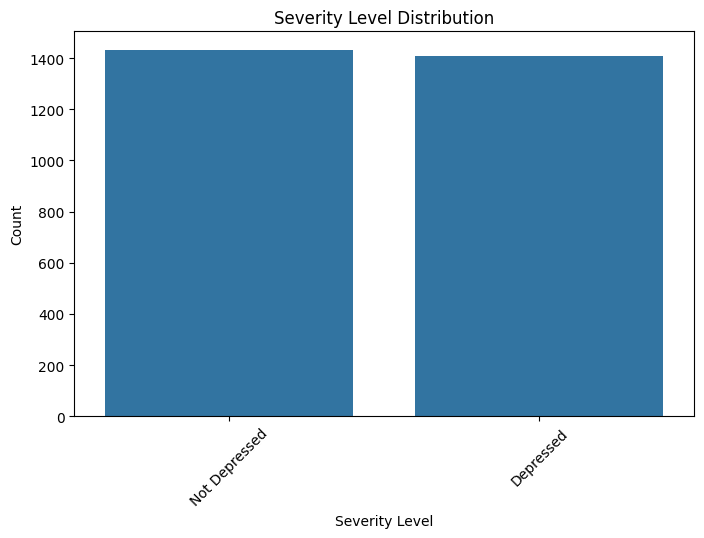

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x='Severity Level', data=df, order=df['Severity Level'].value_counts().index)
plt.title('Severity Level Distribution')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

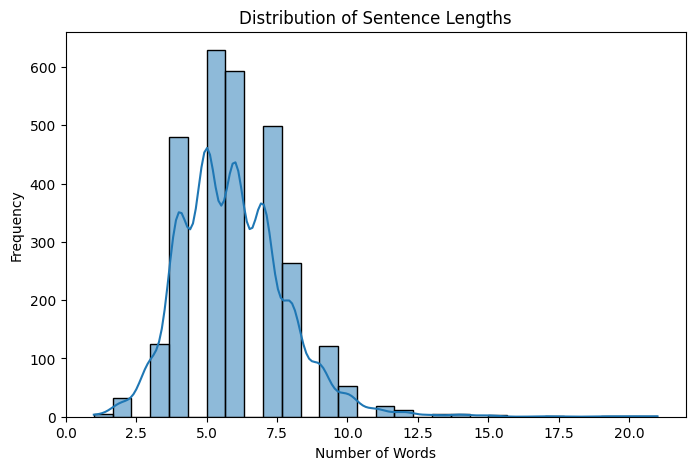

In [11]:
df['sentence_length'] = df['cleaned_sentence'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(df['sentence_length'], bins=30, kde=True)
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [12]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained('bert-base-multilingual-cased')
text = df['cleaned_sentence'][0]

inputs = tokenizer(text, 
                   return_tensors='pt',  # PyTorch tensors
                   max_length=128,       # max tokens
                   truncation=True,
                   padding='max_length')

with torch.no_grad():
    outputs = model(**inputs)
    
# Extract last hidden state embeddings for [CLS] token (sentence embedding)
cls_embedding = outputs.last_hidden_state[:,0,:]  # shape: [1, 768]

In [13]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Tokenize all cleaned texts
encoded_inputs = tokenizer(
    list(df['cleaned_sentence']),
    return_tensors='pt',
    max_length=128,
    padding=True,
    truncation=True
)

# encoded_inputs is a dict with input_ids, attention_mask, etc.
print(encoded_inputs['input_ids'].shape)  # e.g., (num_samples, max_length)


torch.Size([2841, 65])


In [14]:
from transformers import BertTokenizer, BertModel
from torch.utils.data import DataLoader, Dataset

# Custom Dataset for texts
class TextDataset(Dataset):
    def __init__(self, texts):
        self.texts = texts
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        return self.texts[idx]

# Collate function to tokenize and pad batch
def collate_fn(batch):
    return tokenizer(batch,
                     return_tensors='pt',
                     padding='max_length',
                     truncation=True,
                     max_length=64)  # reduced max length for memory

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained('bert-base-multilingual-cased')

# Set device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

model.to(device)
model.eval()

# Prepare dataset and dataloader with batch_size=1 to avoid OOM
dataset = TextDataset(list(df['cleaned_sentence']))
dataloader = DataLoader(dataset, batch_size=2, collate_fn=collate_fn)

all_embeddings = []

with torch.no_grad():
    for batch in dataloader:
        # Move batch tensors to device
        batch = {k: v.to(device) for k, v in batch.items()}
        
        outputs = model(**batch)
        cls_embeddings = outputs.last_hidden_state[:, 0, :]  # CLS token embedding
        
        # Move to CPU and convert to numpy
        all_embeddings.append(cls_embeddings.cpu().numpy())
        
        # Clear cache to avoid fragmentation and OOM
        torch.cuda.empty_cache()

# Stack all embeddings into one numpy array
all_embeddings = np.vstack(all_embeddings)
print(f"CLS embeddings shape: {all_embeddings.shape}")


Using device: cuda
CLS embeddings shape: (2841, 768)


In [15]:
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, random_split
from transformers import BertTokenizer, BertModel
from torch.optim import AdamW
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Encode labels
label_encoder = LabelEncoder()
df['encoded_Severity_Level'] = label_encoder.fit_transform(df['Severity Level'])

# Dataset
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx], self.labels[idx]

# Collate function
def collate_fn(batch):
    texts, labels = zip(*batch)
    tokens = tokenizer(list(texts),
                       return_tensors='pt',
                       padding='max_length',
                       truncation=True,
                       max_length=64)
    return tokens, torch.tensor(labels)

# Model
class BERTClassifier(nn.Module):
    def __init__(self, dropout=0.3):
        super(BERTClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-multilingual-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(self.bert.config.hidden_size, len(label_encoder.classes_))

    def forward(self, input_ids, attention_mask, token_type_ids):
        outputs = self.bert(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        cls_output = outputs.last_hidden_state[:, 0, :]  # CLS token
        cls_output = self.dropout(cls_output)
        return self.linear(cls_output)

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Data
dataset = TextDataset(df['cleaned_sentence'].tolist(), df['encoded_Severity_Level'].tolist())
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size=8, collate_fn=collate_fn, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=8, collate_fn=collate_fn)

# Model init
model = BERTClassifier().to(device)
optimizer = AdamW(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

# Training
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        tokens, labels = batch
        tokens = {k: v.to(device) for k, v in tokens.items()}
        labels = labels.to(device)

        outputs = model(**tokens)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1} | Loss: {total_loss:.4f}")

    # Validation
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            tokens, labels = batch
            tokens = {k: v.to(device) for k, v in tokens.items()}
            labels = labels.to(device)

            outputs = model(**tokens)
            preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    print(f"Validation Accuracy: {acc:.4f}")


Using device: cuda
Epoch 1 | Loss: 162.3069
Validation Accuracy: 0.7698
Epoch 2 | Loss: 116.7913
Validation Accuracy: 0.7944
Epoch 3 | Loss: 95.8708
Validation Accuracy: 0.7786
Epoch 4 | Loss: 84.1435
Validation Accuracy: 0.8014
Epoch 5 | Loss: 63.1817
Validation Accuracy: 0.7856
Epoch 6 | Loss: 51.2453
Validation Accuracy: 0.7926
Epoch 7 | Loss: 37.6839
Validation Accuracy: 0.7733
Epoch 8 | Loss: 27.2938
Validation Accuracy: 0.7979
Epoch 9 | Loss: 24.0021
Validation Accuracy: 0.7733
Epoch 10 | Loss: 23.9723
Validation Accuracy: 0.7856


In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# After validation
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))

print("Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))
# ...existing code...

Classification Report:
               precision    recall  f1-score   support

    Depressed       0.74      0.85      0.79       273
Not Depressed       0.84      0.73      0.78       296

     accuracy                           0.79       569
    macro avg       0.79      0.79      0.79       569
 weighted avg       0.79      0.79      0.79       569

Confusion Matrix:
[[231  42]
 [ 80 216]]


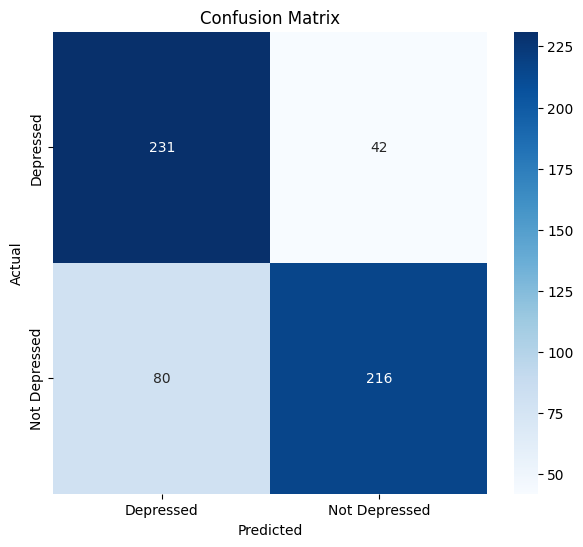

In [17]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Number of classes: 2
Class names: ['Depressed' 'Not Depressed']


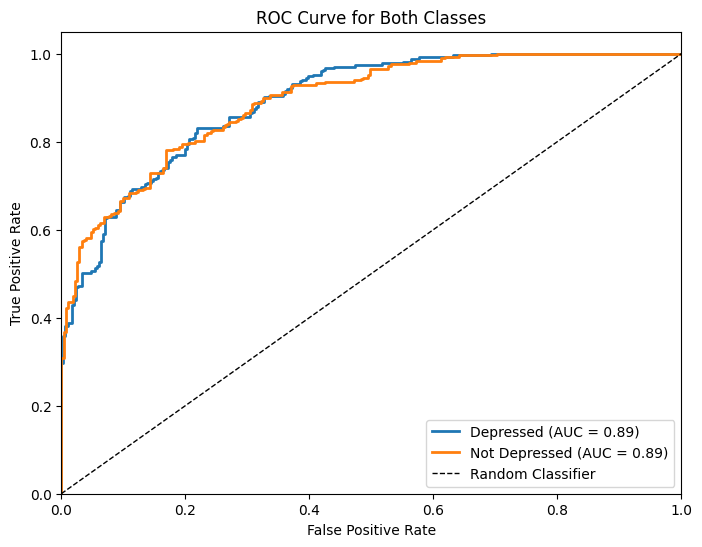

Class distribution in validation set:
  Depressed: 273 samples
  Not Depressed: 296 samples


In [18]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# Get probabilities for all classes
all_probs = []
model.eval()
with torch.no_grad():
    for batch in val_loader:
        tokens, labels = batch
        tokens = {k: v.to(device) for k, v in tokens.items()}
        outputs = model(**tokens)
        probs = torch.softmax(outputs, dim=1)
        all_probs.append(probs.cpu().numpy())
all_probs = np.vstack(all_probs)

# Get number of classes
n_classes = len(label_encoder.classes_)
print(f"Number of classes: {n_classes}")
print(f"Class names: {label_encoder.classes_}")

# For binary classification
if n_classes == 2:
    plt.figure(figsize=(8,6))
    
    # Plot ROC curve for each class
    for i in range(n_classes):
        # Create binary labels for current class vs rest
        y_binary = (np.array(all_labels) == i).astype(int)
        
        # Get probabilities for current class
        class_probs = all_probs[:, i]
        
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_binary, class_probs)
        roc_auc = auc(fpr, tpr)
        
        # Plot the curve
        plt.plot(fpr, tpr, lw=2, 
                label=f'{label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')
    
    # Add random classifier line
    plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Both Classes')
    plt.legend(loc="lower right")
    plt.show()
    
    # Print class distribution
    unique, counts = np.unique(all_labels, return_counts=True)
    print(f"Class distribution in validation set:")
    for i, (class_idx, count) in enumerate(zip(unique, counts)):
        print(f"  {label_encoder.classes_[class_idx]}: {count} samples")
        
else:
    # For multi-class classification
    y_true_bin = label_binarize(all_labels, classes=range(n_classes))

    # Plot ROC curve for each class
    plt.figure(figsize=(8,6))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], all_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve by Class')
    plt.legend(loc="lower right")
    plt.show()

In [19]:
import pickle

# Save the model's state dict (weights)
torch.save(model.state_dict(), "bert_classifier_state_dict.pth")

# Save the tokenizer files
tokenizer.save_pretrained("saved_tokenizer")

# Save the label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

print("Model, tokenizer, and label encoder saved successfully!")


Model, tokenizer, and label encoder saved successfully!


In [20]:
import pickle

# Save the DataFrame with cleaned text to a pickle file
with open('preprocessed_comments.pkl', 'wb') as f:
    pickle.dump(df, f)

print("Preprocessed data saved to preprocessed_comments.pkl")

Preprocessed data saved to preprocessed_comments.pkl
